Assignment 0 | Formation based UAV Path-Planning

# Submission Guidelines Github
Make a copy of this notebook then solve. The name of the solution file should be strictly :- **ProjectName_Rollno_FullName**

Firstly, download the solution notebook in ipynb format, then upload in your forked repository in **Assignment_0 folder** then open pull request as specified on the community group. Note that if your notebook size is greater than 25MB then please reduce it as github only allows file size less than 25MB per upload. You can clear output cell of question 2 solution (only if output plot is taking much space) to reduce size.

Project Repo:-
https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Formation-Based%20UAV%20Path%20Planning

**DEADLINE : 12 DECEMBER EOD**

Please refrain from using any AI tools. All the work should be your own

In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import math

## Question 1:

Consider the flower petal $r(\theta) = 1+3\sin(6 \theta)$ for $0 \leq \theta \leq 2 \pi$

1. Make a plot of the flower (find x and y points)

2. Implement the formulas that you studied in MTH 112 to calculate area and arclength (Do not use any in built functions)

## Your Solution 1

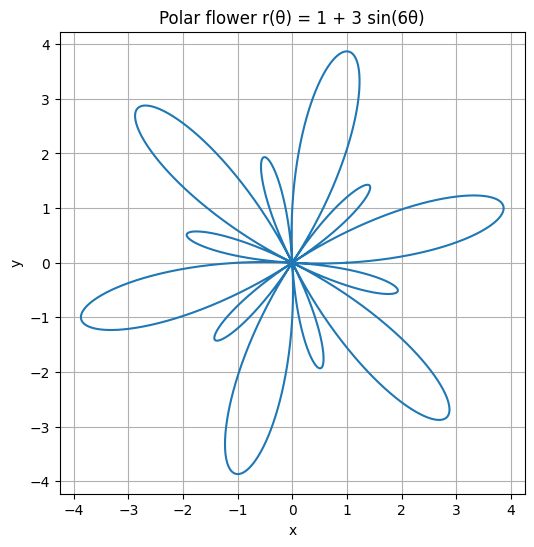

In [3]:
# plot
def r(theta):
    return 1 + 3 * np.sin(6 * theta)

theta = np.linspace(0, 2*math.pi, 4001)
r_vals = r(theta)
x = r_vals * np.cos(theta)
y = r_vals * np.sin(theta)

plt.figure(figsize=(6,6))
plt.plot(x, y)
plt.axis('equal')
plt.title('Polar flower r(θ) = 1 + 3 sin(6θ)')
plt.xlabel('x');
plt.ylabel('y');
plt.grid(True)
plt.show()

In [4]:
# area and arclength
n = 10000
def r(theta):
  return 1+3*np.sin(6*theta)
def dr_dt(theta):
  return 18*np.cos(6*theta)
a=0
b=2*math.pi
h=(b-a)/n
k=np.arange(n)
theta_mid=a+(k+0.5)*h
r_mid=r(theta_mid)
dr_mid=dr_dt(theta_mid)

area = np.sum(0.5*(r_mid**2))*h

dl = np.sqrt((r_mid**2) + (dr_mid**2))
length = np.sum(dl)*h

print(f"By Riemann sum method: area = {area} arclength = {length}")

By Riemann sum method: area = 17.278759594743864 arclength = 74.9476180621357


## Question 2
You are given coordinates of 98 drones representing a closed shape. The drones must follow that path for a show. By using those points plot the epicycle approximation of that shape so that drones can be programmed for that path. (You can use the reference code to draw epicycles in the notebook that we sent you as a resource)

$Position = \{ \ (0,\, 5),(\pm 0.356,\, 4.987),(\pm 0.66,\, 4.96),(\pm 0.98,\, 4.90),(\pm 1.27,\, 4.84),(\pm 2.3,\, 6),(\pm 2.6,\, 7.1),(\pm 3.33,\, 8.49),(\pm 3.91,\, 8.79),(\pm 4.48,\, 8.95),(\pm 5.22,\, 8.99),(\pm 5.90,\, 8.86),(\pm 6.68,\, 8.48),(\pm 7.25,\, 7.98),(\pm 7.64,\, 7.41),(\pm 7.90,\, 6.76),(\pm 8,\, 6),(\pm 7.86,\, 5.11),(\pm 7.20,\, 3.96),(\pm 5.55,\, 3.05),(\pm 4.5,\, 2.18),(\pm 4.65,\, 1.82),(\pm 4.81,\,\pm 1.37),(\pm 4.90,\,\pm 0.98),(\pm 4.96,\, \pm 0.66),(\pm 4.99,\,\pm 0.36),(\pm 5,\, 0),(\pm 5.12,\, -1.66),(\pm 5.20,\, -2.04),(\pm 5.06,\, -2.63),(\pm 4.79,\, -3.11),(\pm 4.55,\, -3.41),(\pm 4.28,\, -3.66),(\pm 3.99,\, -3.87),(\pm 3.68,\, -4.05),(\pm 3.29,\, -4.18),(\pm 3,\, -4.21),(\pm 2.87,\, -4.30),(\pm 2.6,\, -4.48),(\pm 2.33,\, 4.67),(\pm 2.14,\, -4.81),(\pm 1.71,\, -5.13),(\pm 1.22,\, -5.46),(\pm 0.9,\, -5.62),(\pm 0.4,\, -5.80),(0,\, -5.85) \}$

Assume origin as the center of first circle.

### Given points array

In [5]:
points = np.array([(0, 5),
 (0.356, 4.987),
 (0.66, 4.96),
 (0.98, 4.9),
 (1.27, 4.84),
 (2.3, 6),
 (2.6, 7.1),
 (3.33, 8.49),
 (3.91, 8.79),
 (4.48, 8.95),
 (5.22, 8.99),
 (5.9, 8.86),
 (6.68, 8.48),
 (7.25, 7.98),
 (7.64, 7.41),
 (7.9, 6.76),
 (8, 6),
 (7.86, 5.11),
 (7.2, 3.96),
 (5.55, 3.05),
 (4.5, 2.18),
 (4.65, 1.82),
 (4.81, 1.37),
 (4.9, 0.98),
 (4.96, 0.66),
 (4.99, 0.36),
 (5, 0),
 (4.99, -0.36),
 (4.96, -0.66),
 (4.9, -0.98),
 (4.81, -1.37),
 (5.12, -1.66),
 (5.2, -2.04),
 (5.06, -2.63),
 (4.79, -3.11),
 (4.55, -3.41),
 (4.28, -3.66),
 (3.99, -3.87),
 (3.68, -4.05),
 (3.29, -4.18),
 (3, -4.21),
 (2.87, -4.3),
 (2.6, -4.48),
 (2.33, -4.67),
 (2.14, -4.81),
 (1.71, -5.13),
 (1.22, -5.46),
 (0.9, -5.62),
 (0.4, -5.8),
 (0, -5.85),
 (-0.4, -5.8),
 (-0.9, -5.62),
 (-1.22, -5.46),
 (-1.71, -5.13),
 (-2.14, -4.81),
 (-2.33, -4.67),
 (-2.6, -4.48),
 (-2.87, -4.3),
 (-3, -4.21),
 (-3.29, -4.18),
 (-3.68, -4.05),
 (-3.99, -3.87),
 (-4.28, -3.66),
 (-4.55, -3.41),
 (-4.79, -3.11),
 (-5.06, -2.63),
 (-5.2, -2.04),
 (-5.12, -1.66),
 (-4.81, -1.37),
 (-4.9, -0.98),
 (-4.96, -0.66),
 (-4.99, -0.36),
 (-5, 0),
 (-4.99, 0.36),
 (-4.96, 0.66),
 (-4.9, 0.98),
 (-4.81, 1.37),
 (-4.65, 1.82),
 (-4.5, 2.18),
 (-5.55, 3.05),
 (-7.2, 3.96),
 (-7.86, 5.11),
 (-8, 6),
 (-7.9, 6.76),
 (-7.64, 7.41),
 (-7.25, 7.98),
 (-6.68, 8.48),
 (-5.9, 8.86),
 (-5.22, 8.99),
 (-4.48, 8.95),
 (-3.91, 8.79),
 (-3.33, 8.49),
 (-2.6, 7.3),
 (-2.3, 6),
 (-1.27, 4.84),
 (-0.98, 4.9),
 (-0.66, 4.96),
 (-0.356, 4.987)])

len(points)

98

### 2.1) Plot the points using matplotlib. What shape did you noticed ?

### 2.2) Plot the epicyclic approximation of this shape. Assume all the points of this shape are (xn,yn) means there are n circles having radii $R_i$, angular frequency $w_i$ and phase $\phi_i$ (from i = 1 to n) representing the given shape

$$
x_n = \sum_{i=1}^{n} R_i \cos(\omega_i t + \phi_i), \qquad
y_n = \sum_{i=1}^{n} R_i \sin(\omega_i t + \phi_i)
$$

We can generalize it as a complex number   

$$z_n = \sum_{i=1}^n R_i e^{ j (\omega_i t + \phi_i) } = \sum_{i=1}^n C_i e^{ j (\omega_i t)}$$

where  $j = \sqrt{-1}$   and   $C_ie^{j \omega_i t}$ represents a circle of radii $R_i$, angular frequency $w_i$ and phase $\phi_i$

## Hints Q2
It will be difficult to derive the formula to calculate $C_i$ for each term. So, here's the in built function for that. (It requires the knowledge of Fourier transforms which some of you will study in 2nd year and its currently out of scope)

In [14]:
# First convert each point into a complex number then use the below code to calculate R_i , w_i and phi_i via C_i
# N = 98 drones
#C = np.fft.fft(z)/N #where z is the array of complex numbers of points
#w = 2*np.pi*(np.fft.fftfreq(N, d=1/N))
#Ri is magnitude of Ci
#phi_i is angle of Ci

## Your Solution 2

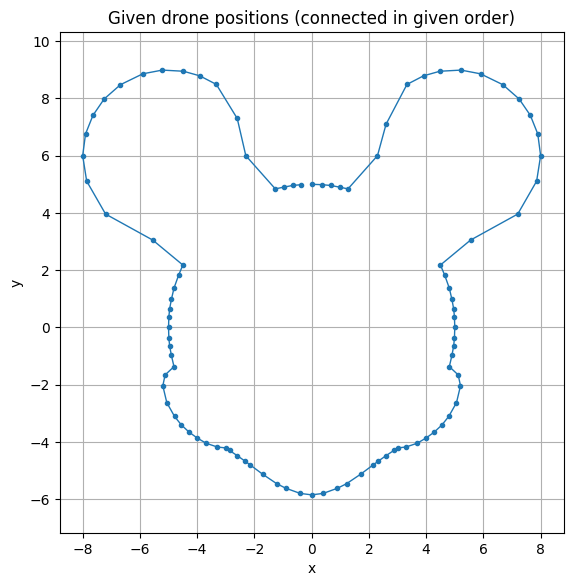

In [15]:
#1
plt.figure(figsize=(6.5,6.5))
plt.plot(points[:,0], points[:,1],'-o', linewidth=1, markersize=3)
plt.title('Given drone positions (connected in given order)')
plt.xlabel('x');
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.show()

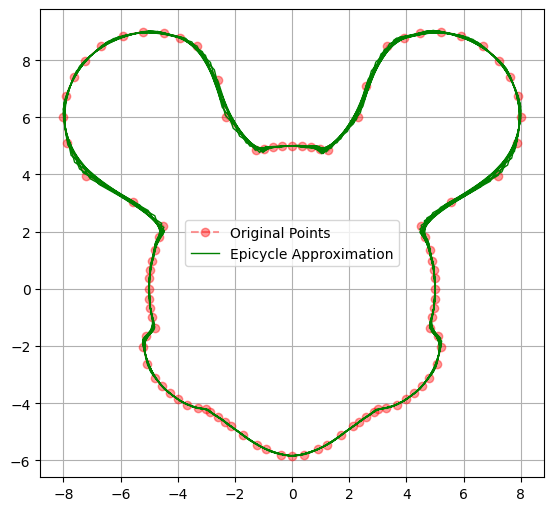

In [23]:
#2
z = points[:,0] + 1j*points[:,1]
N = 98
C = np.fft.fft(z)/N
w = 2*np.pi*(np.fft.fftfreq(N, d=1/N))
R = np.abs(C)
phi = np.angle(C)

t = np.linspace(0, 2*np.pi, 500)
z_recon = np.zeros_like(t, dtype=complex)

for i in range(N):
    z_recon += R[i] * np.exp(1j*(w[i]*t + phi[i]))

plt.figure(figsize=(6.5,6.5))
plt.plot(points[:,0], points[:,1], '--o', alpha=0.4, label="Original Points", color = 'red')
plt.plot(z_recon.real, z_recon.imag, '-', linewidth=1, label="Epicycle Approximation", color = 'green')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.show()

## Question 3
The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for a drone is given by

$$ E = \alpha \int_{C} \left| \frac{d\vec{r}}{dt} \right| dt - \int_C \vec{F} \cdot \frac{d\vec{r}}{dt}dt $$



3.1) Suppose that $\alpha=5$ and our start and ends points are $\vec{r}_1 = (0,0)$ and $\vec{r}_2 = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Approximate the optimal value of $A$ (A>0) in $\vec{r}(t) = A\sin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the **work** using only numpy arrays .

3.2) Plot Energy as a function of A . (E(A) v/s A ) ? (Comment about its shape)

## Your Solution 3

In [24]:
#1
alpha=5
t0,t1=0,10
n=10000
h=(t1-t0)/n

k=np.arange(n)
t_mid=t0+(k+0.5)*h

omega=math.pi/10
cos_mid=np.cos(omega*t_mid)
sin_mid=np.sin(omega*t_mid)

def E(A):
  dxdt_mid=A*omega*cos_mid
  speed_mid=np.sqrt(dxdt_mid**2+1)
  int1=np.sum(speed_mid)*h

  x_mid=A*sin_mid
  smth=2.0/((x_mid+1)**2)
  int2=np.sum(smth)*h

  E=alpha*int1 + int2
  return E

A_values = np.linspace(0.01, 8.0, 200)
E_values = np.array([E(A) for A in A_values])

A_opt = A_values[np.argmin(E_values)]
E_opt = np.min(E_values)

print("Refined optimal A:", A_opt)
print("Energy at optimal A:", E_opt)

Refined optimal A: 1.4152763819095477
Energy at optimal A: 59.16713762624366


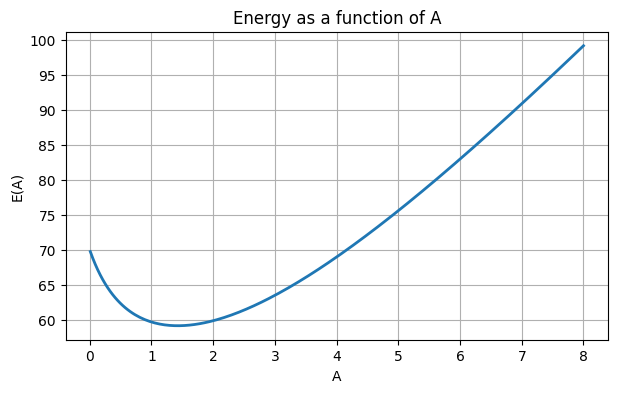

In [25]:
#2
plt.figure(figsize=(7,4))
plt.plot(A_values, E_values, linewidth=2)
plt.xlabel("A")
plt.ylabel("E(A)")
plt.title("Energy as a function of A")
plt.grid(True)
plt.show()

## Question 4

You decide to install a series of camera drones along a straight path to spy on a suspicious person located at marker 31

You buy four drones and they are evenly spaced starting from mile marker 16 and ending on mile marker 25.

You buy another four drones starting on mile marker 29 and ending on mile marker 34. (also evenly spaced)

A drone can face only one direction at a time.
In order, from marker 16 to 34, each drone's orientation : N,S,E,W,S,E,W,N. (where N,S,E,W are cardinal directions)

Determine how far each drone facing E is from the person? (Solve using Numpy only)

## Your Solution 4

In [12]:
# code
person = 31.0
group1 = np.linspace(16.0, 25.0, 4)
group2 = np.linspace(29.0, 34.0, 4)
positions = np.concatenate([group1, group2])
orientations = np.array(['N','S','E','W','S','E','W','N'])
drones_facing_east = (orientations == 'E')
east_positions = positions[drones_facing_east]
distances = np.abs(east_positions - person)
print("Distances to person at marker 31:", np.round(distances,6))


Distances to person at marker 31: [9.       0.333333]
